In [1]:
import prody as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wget
file_tuto = wget.download('http://prody.csb.pitt.edu/tutorials/comd_tutorial/comd_tutorial_files.tgz')

In [3]:
!tar -xzvf comd_tutorial_files.tgz

comd_tutorial_files/._1ake.pdb
comd_tutorial_files/1ake.pdb
comd_tutorial_files/._4ake.pdb
comd_tutorial_files/4ake.pdb
comd_tutorial_files/final_ionized.pdb
comd_tutorial_files/final_trajectory.dcd
comd_tutorial_files/initial_ionized.pdb
comd_tutorial_files/initial_trajectory.dcd


In [4]:
dcd1 = pd.Trajectory('comd_tutorial_files/initial_trajectory.dcd')
dcd2 = pd.Trajectory('comd_tutorial_files/final_trajectory.dcd')
structure1 = pd.parsePDB('comd_tutorial_files/initial_ionized.pdb')
structure2 = pd.parsePDB('comd_tutorial_files/final_ionized.pdb')

dcd1.setCoords(structure1)
dcd1.setAtoms(structure1.calpha)

dcd2.setCoords(structure2)
dcd2.setAtoms(structure2.calpha)

pd.writeDCD('comd_tutorial_files/initial_filtered.dcd', dcd1)
pd.writeDCD('comd_tutorial_files/final_filtered.dcd', dcd2)

traj = pd.Trajectory('comd_tutorial_files/initial_filtered.dcd')
traj.addFile('comd_tutorial_files/final_filtered.dcd')

pca = pd.PCA('Adelynate Kinase coMD')
pca.buildCovariance(traj)
pca.calcModes()

@> 29031 atoms and 1 coordinate set(s) were parsed in 0.20s.
@> 36588 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> DCD file was written in 0.45 seconds.
@> 0.10 MB written at input rate 0.22 MB/s.
@> 40 coordinate sets written at output rate 88 frame/s.
@> DCD file was written in 0.45 seconds.
@> 0.10 MB written at input rate 0.22 MB/s.
@> 40 coordinate sets written at output rate 88 frame/s.
@> Covariance will be calculated using 80 frames.
@> Covariance matrix calculated in 0.267859s.
@> 20 modes were calculated in 0.07s.


In [5]:
traj

<Trajectory: initial_filtered (2 files; next 0 of 80 frames; 214 atoms)>

@> Superposition completed in 0.06 seconds.
@> Superposition completed in 0.06 seconds.


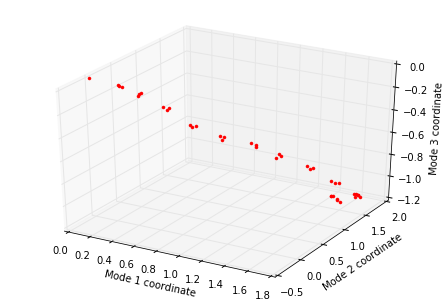

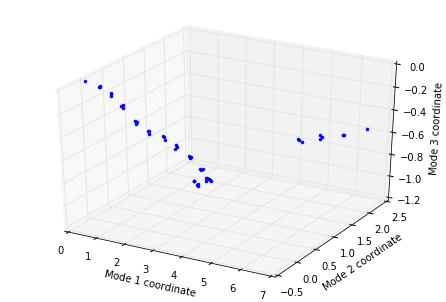

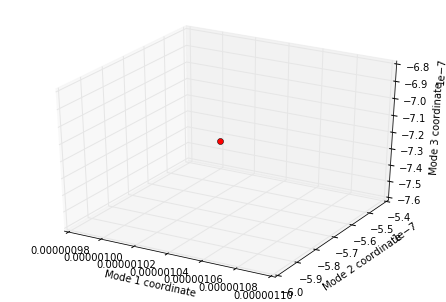

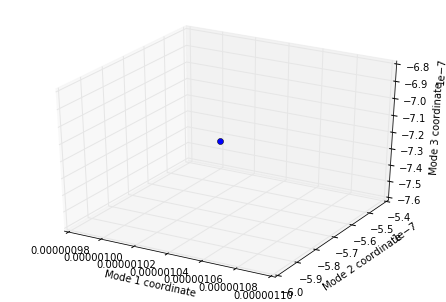

'ake_pca.nmd'

In [15]:
forward = traj[0:40]
backward = traj[40:]

forward.superpose()
backward.superpose()

pd.showProjection(forward, pca[:3], color='red', marker='.');
pd.showProjection(backward, pca[:3], color='blue', marker='.');
pd.showProjection(forward[0], pca[:3], color='red', marker='o');
pd.showProjection(backward[0], pca[:3], color='blue', marker='o');

pd.writeNMD('ake_pca.nmd', pca[:3], structure1.select('calpha'))